# NavierStokes Machine - Experimental Project for Machine Learning Capstone
### Objective:
Try to apply machine learning techniques to improve the speed in CFD simulations.
#### References:
Data-driven projection method in fluid simulation (Cheng Yang, Xubo Yang* and Xiangyun Xiao,2016)
#### Notes:
This is just an initial experimentation to see if the results are consistent.
The simulations for the CFD were done with OpenFOAM v.4 for transient incompressible flow, using the **pimpleFoam** solver.

----
## Data Preparation
The simulation chosen was a 2D transient incompressible fluid passing through a box.

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [15]:
file_list = []
file_list.append(pd.read_table('meshcoord.txt',sep="\s+"))
file_list.append(pd.read_table('0.1/pressure.txt'))
file_list.append(pd.read_csv('0.1/velocity.txt',sep="\s+"))
df = pd.DataFrame()
df = pd.concat(file_list,axis=1)
df = df.drop(['vz','v','ccz'],axis=1)
df.head()

,ccx,ccy,pressure,vx,vy
0,0.01,0.01,0.000427,0.006651,0.000037
1,0.03,0.01,0.000119,0.010985,0.000031
2,0.05,0.01,0.000162,0.009897,0.000023
3,0.07,0.01,0.000170,0.009788,0.000022
4,0.09,0.01,0.000168,0.009768,0.000022


Checking to see if the data was imported correctly.

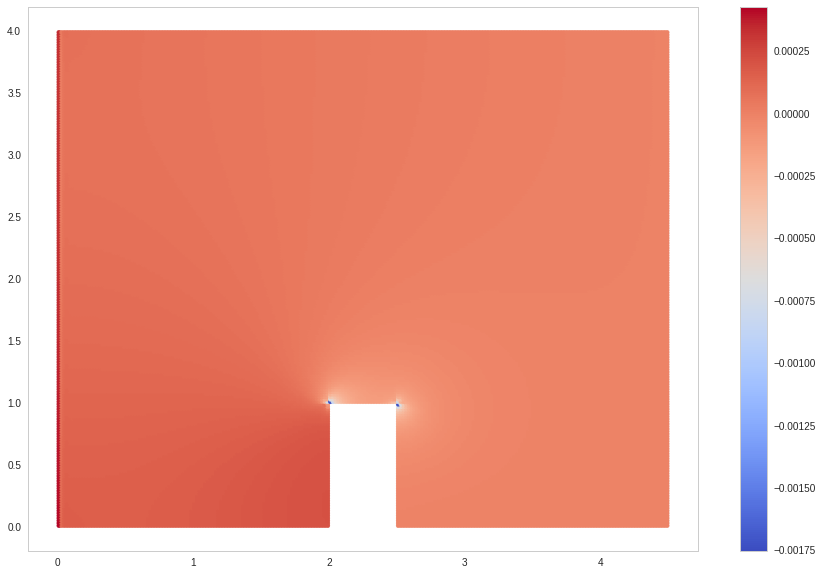

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(df.ccx,df.ccy,c=df.pressure,s=20.,cmap='coolwarm')
plt.colorbar()

Dividing the data in a grid format (puting into an image like format), for easier manipulation.

In [17]:
vx,ccx,ccy = np.histogram2d(df.ccx,df.ccy,weights=df.vx,bins=(225,200))
vy,ccx,ccy = np.histogram2d(df.ccx,df.ccy,weights=df.vy,bins=(225,200))
p,ccx,ccy = np.histogram2d(df.ccx,df.ccy,weights=df.pressure,bins=(225,200))
_,ccx,ccy = np.histogram2d(df.ccx,df.ccy,weights=df.vx,bins=(224,199))

Creating a Boundary variable ("o" for obstacle). This represents areas in that were "walls", "inlets" or "outlets", in which boundary conditions were prescribed.

In [8]:
o = np.zeros((225,200))
xg, yg = np.meshgrid(np.arange(100,125,1),np.arange(0,50,1))
for i in np.arange(100,125,1):
    for j in np.arange(0,50,1):
        o[i,j] = 1

Creating a padding accross the simulation domain.

In [10]:
VY = np.vstack((np.zeros(200),vy,np.zeros(200)))
VY = np.hstack((np.zeros((227,1)),VY,np.zeros((227,1))))
VX = np.vstack((np.zeros(200),vx,np.zeros(200)))
VX = np.hstack((np.zeros((227,1)),VX,np.zeros((227,1))))
P = np.vstack((np.zeros(200),p,np.zeros(200)))
P = np.hstack((np.zeros((227,1)),P,np.zeros((227,1))))
O = np.vstack((np.ones(200)+5,o,np.ones(200)+2))
O = np.hstack((np.ones((227,1)),O,np.ones((227,1))))


Adjusting the matrix direction and checking if the final result is what was expected.

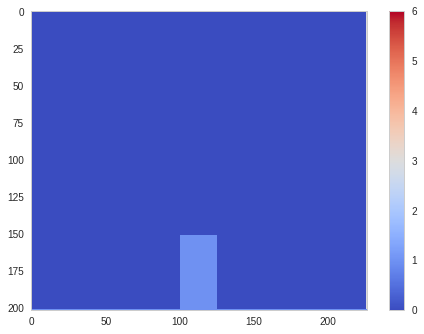

In [12]:
VX = VX.T[::-1]
VY = VY.T[::-1]
P  = P.T[::-1]
O  = O.T[::-1]

plt.imshow(O,cmap='coolwarm')
plt.colorbar()

The data preparation looks good. The Boundary variable shows that the obstacle was captures correctly. Next, time to try some machine learning to predict the pressure in each cell based on velocity, pressure and boundary of the previous time-step.